In [1]:
import statsmodels.stats.proportion

In [2]:
def get_confidence_bounds(succs, total):
    interval = statsmodels.stats.proportion.proportion_confint(succs, total, alpha=0.05, method='wilson')
    #print(interval)
    return interval

In [3]:
get_confidence_bounds(25,25)

(0.8668077490609515, 1.0)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ugnczqzd because the default path (/home/tsr42/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [5]:
gap = 2
basexs = np.array([0,1,2,3,4])
xs = np.array(basexs.tolist() + (basexs+ 5 + gap).tolist())*2
successes = [5,21,24,25,25,0,8,19,25,25]
ys = np.array(successes)/25
yerrs = np.abs(np.array([get_confidence_bounds(s,25) for s in successes]).T-ys)
print(yerrs)
tick_labs = np.array(["$45^\circ$ Baseline","$75^\circ$ Baseline","$30^\circ$ CurvVAE","$45^\circ$ CurvVAE","$60^\circ$ CurvVAE"] * 2)
blue = ((np.array([0,47,108])+100)/255).tolist()
red = (np.array([170,20,45])/200).tolist()

colors = np.array(([red] * 2 + [blue] * 3) * 2)
hatches = (["/"] * 2 + [""]*3)*2

[[0.11139415 0.18653622 0.15544064 0.13319225 0.13319225 0.
  0.1479481  0.19429683 0.13319225 0.13319225]
 [0.1913095  0.09596549 0.03290377 0.         0.         0.13319225
  0.19589731 0.12503686 0.         0.        ]]


In [6]:
import matplotlib
font = {'size'   : 22}
matplotlib.rc('font', **font)

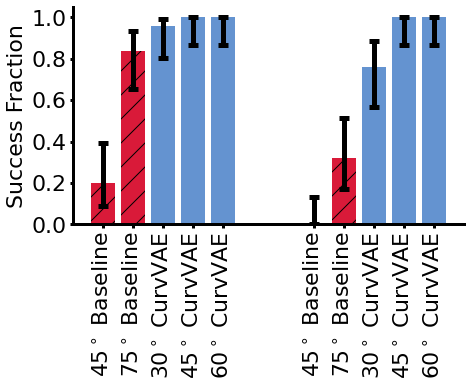

In [7]:
f,ax = plt.subplots(1,1,figsize=(7,4))
for i in range(len(xs)):
    q = plt.bar(xs[i],ys[i],yerr=yerrs[:,i:i+1],color=colors[i],capsize=5,error_kw={"linewidth":5,"markeredgewidth":5},width=1.6,hatch=hatches[i])
plt.xticks(ticks=xs,labels=tick_labs,rotation = 90)
plt.yticks(ticks=np.linspace(0,1,6), labels = ["%0.1f" % v for v in np.linspace(0,1,6)])
plt.ylabel("Success Fraction")
plt.ylim(-0.00,1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.spines.values(), linewidth=5)
plt.setp(ax.spines.values(), linewidth=5)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
savefilename = "images/successResultBarChart.png"
plt.setp(ax.spines.values(), linewidth=3)
plt.savefig(savefilename,bbox_inches="tight")

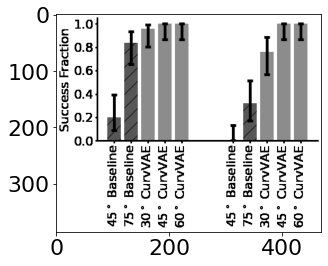

In [8]:
from PIL import Image
img = Image.open(savefilename).convert("L")
plt.imshow(img,cmap="gray")
plt.show()
plt.close()

# Test Significance

In [18]:
import scipy.stats
successes = np.array((8,25),dtype=np.int)
fails = 25 -successes
matrix = np.concatenate([successes,fails],axis=0).reshape(2,2)
print(matrix)
scipy.stats.fisher_exact(matrix, alternative='less')

[[ 8 25]
 [17  0]]


(0.0, 1.0983378999005841e-07)